<a href="https://colab.research.google.com/github/CodesByNehaal/prophet/blob/main/Stock_price_prediction_using_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#*****************************************************************PART 3******************************************************************
!pip install fbprophet
!pip install yfinance


In [ ]:
#IMPORTING ALL THE NECESSARY PACKAGES.
import matplotlib.pyplot as plt                                                 #Importing matplotlib to plot and analyse data.
from pandas import read_csv
from fbprophet import Prophet                                                   #Importing prophet (prediction and forecasting library.)
import yfinance as yf                                                           #importing yahoo finance to generate historic data. 

In [ ]:
ticker = input("ENTER THE STOCK WHOSE PREDICTION YOU WANT : ")                  #taking stock name from the user.
data_frame = yf.download(ticker+'.NS', start='2017-04-30' , end='2022-04-30')   #using yf.download() downloading historic data for a stock for previous 5 years.
print(data_frame.tail())


ENTER THE STOCK WHOSE PREDICTION YOU WANT : TATAPOWER
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-25  248.000000  251.550003  244.699997  247.350006  247.350006   
2022-04-26  251.149994  251.449997  248.050003  248.850006  248.850006   
2022-04-27  247.800003  255.250000  245.500000  247.350006  247.350006   
2022-04-28  250.899994  250.899994  244.399994  248.250000  248.250000   
2022-04-29  250.899994  253.199997  240.850006  242.350006  242.350006   

              Volume  
Date                  
2022-04-25  24620801  
2022-04-26  17965504  
2022-04-27  32027943  
2022-04-28  20911099  
2022-04-29  26234765  


In [ ]:
data_frame = data_frame.reset_index()                                           #indexing data_frame 
data_frame[['ds','y']] = data_frame[['Date','Adj Close']]                       #preparing expected column names
data_frame.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
1231,2022-04-25,248.000000,251.550003,244.699997,247.350006,247.350006,24620801,2022-04-25,247.350006
1232,2022-04-26,251.149994,251.449997,248.050003,248.850006,248.850006,17965504,2022-04-26,248.850006
1233,2022-04-27,247.800003,255.250000,245.500000,247.350006,247.350006,32027943,2022-04-27,247.350006
1234,2022-04-28,250.899994,250.899994,244.399994,248.250000,248.250000,20911099,2022-04-28,248.250000
1235,2022-04-29,250.899994,253.199997,240.850006,242.350006,242.350006,26234765,2022-04-29,242.350006


In [ ]:
model = Prophet()                                                               #creating an instant of prophet class in model.
model.fit(data_frame)                                                           #fitting data_frame to the model.
future = model.make_future_dataframe(365)                                       #making future dataframe for 365 days and storing the date values in future.
forecast = model.predict(future)                                                #using predict function of python, predicting the values for future data values and storing it in forecast.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


          ds       yhat  yhat_lower  yhat_upper
0 2017-05-02  67.184308   54.365029   79.621118
1 2017-05-03  67.296526   55.049952   79.292514
2 2017-05-04  67.117464   55.128900   78.878217
3 2017-05-05  66.691679   53.535816   79.380150
4 2017-05-08  67.068565   54.941319   78.720464


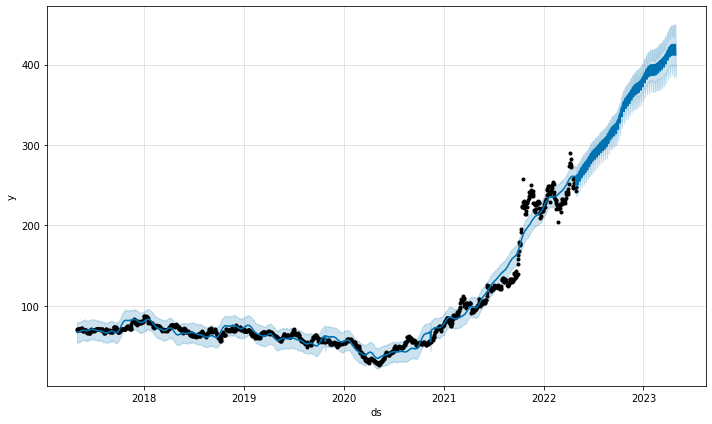

In [ ]:
model.plot(forecast)                                                            #plotting the values in forecast using atplotlib.
plt.show()                                                                      #displaying the graph.